<a href="https://colab.research.google.com/github/danielbauer1979/ML_656/blob/main/Assignment3_LASSO_Sol.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Assignment 3

Let's install relevant packages. Again, we're going to rely on the statistical learning toolkit ski-cit learn, which provides LASSO regression but also has many other predictive models. As before, it is less comfortable to use than some of the other packages and, unlike R, does not support formulas. But it is versatile and fast, and therefore one of the most popular predictive modeling toolkits.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, LassoCV
from sklearn.metrics import mean_squared_error

## Practical Application: Predicting Claim Sizes

We consider a data set of claim sizes (severities) from Allstate, that was used in a [Kaggle competition](https://www.kaggle.com/c/allstate-claims-severity) and is now available from various repositories, e.g. [here](https://github.com/Architectshwet/Allstate-Claims-Severity-Data/blob/master/Datasets).

Let's load it, and take a look:

In [ ]:
!git clone https://github.com/danielbauer1979/ML_656.git

Cloning into 'ML_656'...
remote: Enumerating objects: 296, done.
remote: Counting objects: 100% (179/179), done.
remote: Compressing objects: 100% (103/103), done.
remote: Total 296 (delta 105), reused 123 (delta 76), pack-reused 117
Receiving objects: 100% (296/296), 24.07 MiB | 14.72 MiB/s, done.
Resolving deltas: 100% (155/155), done.


In [ ]:
dat_1 = pd.read_csv('ML_656/Allstate_train1.csv')
dat_2 = pd.read_csv('ML_656/Allstate_train2.csv')
dat_3 = pd.read_csv('ML_656/Allstate_train3.csv')
df = pd.concat([dat_1,dat_2,dat_3])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 188317 entries, 0 to 68316
Columns: 132 entries, id to loss
dtypes: float64(15), int64(1), object(116)
memory usage: 191.1+ MB


In [ ]:
df.head()

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
0,1,A,B,A,B,A,A,A,A,B,...,0.718367,0.335060,0.30260,0.67135,0.83510,0.569745,0.594646,0.822493,0.714843,2213.18
1,2,A,B,A,A,A,A,A,A,B,...,0.438917,0.436585,0.60087,0.35127,0.43919,0.338312,0.366307,0.611431,0.304496,1283.60
2,5,A,B,A,A,B,A,A,A,B,...,0.289648,0.315545,0.27320,0.26076,0.32446,0.381398,0.373424,0.195709,0.774425,3005.09
3,10,B,B,A,B,A,A,A,A,B,...,0.440945,0.391128,0.31796,0.32128,0.44467,0.327915,0.321570,0.605077,0.602642,939.85
4,11,A,B,A,B,A,A,A,A,B,...,0.178193,0.247408,0.24564,0.22089,0.21230,0.204687,0.202213,0.246011,0.432606,2763.85


In [ ]:
df.describe()

,id,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
count,188317.000000,188317.000000,188317.000000,188317.000000,188317.000000,188317.000000,188317.000000,188317.000000,188317.000000,188317.000000,188317.000000,188317.000000,188317.000000,188317.000000,188317.000000,188317.000000
mean,294136.546440,0.493862,0.507190,0.498918,0.491814,0.487429,0.490946,0.484971,0.486439,0.485507,0.498067,0.493512,0.493152,0.493139,0.495718,3037.346151
std,169336.357671,0.187640,0.207201,0.202105,0.211292,0.209027,0.205272,0.178450,0.199370,0.181660,0.185876,0.209736,0.209426,0.212777,0.222488,2904.091574
min,1.000000,0.000016,0.001149,0.002634,0.176921,0.281143,0.012683,0.069503,0.236880,0.000080,0.000000,0.035321,0.036232,0.000228,0.179722,0.670000
25%,147748.000000,0.346090,0.358319,0.336963,0.327354,0.281143,0.336105,0.350175,0.312800,0.358970,0.364580,0.310961,0.311661,0.315758,0.294610,1204.460000
50%,294542.000000,0.475784,0.555782,0.527991,0.452887,0.422268,0.440945,0.438285,0.441060,0.441450,0.461190,0.457203,0.462286,0.363547,0.407403,2115.580000
75%,440682.000000,0.623912,0.681761,0.634224,0.652072,0.643315,0.655021,0.591045,0.623580,0.566820,0.614590,0.678924,0.675759,0.689974,0.724623,3864.050000
max,587633.000000,0.984975,0.862654,0.944251,0.954297,0.983674,0.997162,1.000000,0.980200,0.995400,0.994980,0.998742,0.998484,0.988494,0.844848,121012.250000


So it is a large data set, and it is particularly large in the $p$ direction -- that is, there are many co-variates. So possibly shrinkage and selection will come in handy here.  One quick comment about the dataset and many Kaggle competitions more generally:  We don't really know what the variables `catx' and 'contx' stand for, so it is difficult to use experience/intuition in building a model -- which is an important aspect in real-world applications.  So performing well in a kaggle competition does not necessarily qualify a data scientist to work in the insurance industry.

## Preparing the data

There are a few very small losses that are outliers.  We thus disregard losses that are very small and  keep only records with loss greater or equal to $\$100$, also because we are interested in these in actual settings.

In [ ]:
df = df[df['loss']>100]

In [ ]:
del df['id']

I will work with the whole dataset--although running this will take a bit. It's easier to work with a reduced dataset, as I had mentioned.

In [ ]:
#df = df.sample(n=50000, random_state=45)

We convert categoricals into dummies:

In [ ]:
objects = []
for c in df.columns:
    if str(df[c].dtype) == 'object':
        objects.append(c)
X_ = df.drop(objects, axis = 1).astype('float64')
X_ = X_.drop(['loss'], axis = 1)
dummies = pd.get_dummies(df[objects], drop_first=True)
X = pd.concat([X_, dummies], axis = 1)
y = df.loss

Let's look at out features:

In [ ]:
X

,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,...,cat116_P,cat116_Q,cat116_R,cat116_S,cat116_T,cat116_U,cat116_V,cat116_W,cat116_X,cat116_Y
0,0.726300,0.245921,0.187583,0.789639,0.310061,0.718367,0.335060,0.30260,0.67135,0.83510,...,0,0,0,0,0,0,0,0,0,0
1,0.330514,0.737068,0.592681,0.614134,0.885834,0.438917,0.436585,0.60087,0.35127,0.43919,...,0,0,0,0,0,0,0,0,0,0
2,0.261841,0.358319,0.484196,0.236924,0.397069,0.289648,0.315545,0.27320,0.26076,0.32446,...,0,0,0,0,0,0,0,0,0,0
3,0.321594,0.555782,0.527991,0.373816,0.422268,0.440945,0.391128,0.31796,0.32128,0.44467,...,0,0,0,0,0,0,0,0,0,0
4,0.273204,0.159990,0.527991,0.473202,0.704268,0.178193,0.247408,0.24564,0.22089,0.21230,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68312,0.347403,0.785784,0.613660,0.473202,0.939556,0.242437,0.289949,0.24564,0.30859,0.32935,...,0,0,0,0,0,0,0,0,0,0
68313,0.507661,0.555782,0.549770,0.802892,0.704268,0.334270,0.382000,0.63475,0.40455,0.47779,...,0,0,0,0,0,0,0,0,0,0
68314,0.484469,0.785784,0.792378,0.189137,0.482436,0.345883,0.370534,0.24564,0.45808,0.47779,...,0,0,0,0,0,0,0,0,0,0
68315,0.438385,0.422197,0.298977,0.383428,0.340543,0.704364,0.562866,0.34987,0.44767,0.53881,...,0,0,0,0,0,0,0,0,0,0


<BarContainer object of 1037 artists>

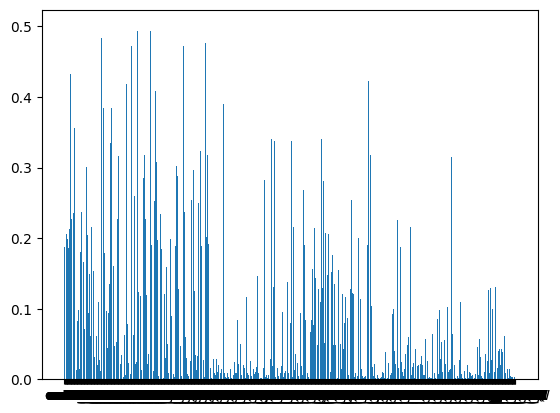

In [ ]:
plt.bar(X.columns,X.std(axis=0))

So it seems like all the variables are already at similar scales, so it doesn't seem necessary to normalize the data.

We still carry out this step just to make sure.

<BarContainer object of 1037 artists>

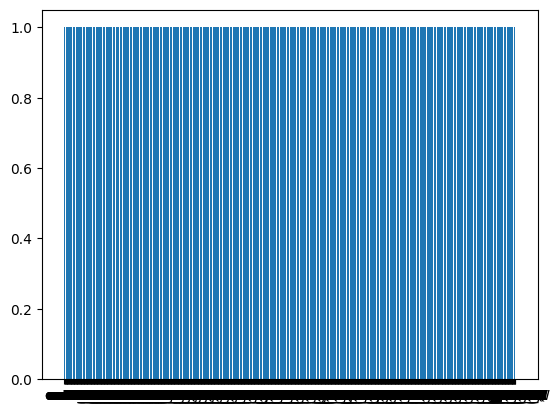

In [ ]:
X_org = X
scaler = StandardScaler()
X = scaler.fit_transform(X)
plt.bar(X_org.columns,X.std(axis=0))

We see that now the standard deviations of all features are the same at 1.

We split data into training and test sets:

In [ ]:
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1)
X_val, X_test, y_val, y_test = train_test_split(X_test,y_test,test_size = 0.5, random_state=2)

We go to lods. The log-transformation makes the data much more amenable to regression.

In [ ]:
y_train = np.log(y_train)
y_val = np.log(y_val)
y_test = np.log(y_test)

##Run Models

We start with OLS:

In [ ]:
model_ols = LinearRegression(fit_intercept=True)
model_ols.fit(X_train, y_train)
print(model_ols.intercept_)
print(model_ols.coef_)

11957948256.784447
[-3.56000113e-02  4.71393027e-02  4.55851242e-02 ... -3.42345416e+11
 -9.63668077e+10  1.77268134e+10]


The RMSE is

In [ ]:
TestRMSE_ols = np.sqrt(mean_squared_error(y_test,model_ols.predict(X_test)))
print(TestRMSE_ols)

5469250024707.583


So this is huge, which is likely due to some weird samples. Let's check how far we off at the median, 90% percentile, and 99th percentile:

In [ ]:
tmp = np.abs(model_ols.predict(X_test)-y_test)
print(np.median(tmp))
print(np.quantile(tmp,0.9))
print(np.quantile(tmp,0.99))

0.3665012713343412
0.9136090524441819
1.5413015655905833


So that looks more resonable --- on median, we are off .367

##LASSO Regression

And let's run a LASSO regression, with some predefined values of lambda (which `sklearn` calls alpha):

In [ ]:
#alphas = np.array([0.002, 0.0025, 0.003, 0.0035, 0.004]) #use this if you use the 50K dataset
alphas = np.array([0.00075, 0.0008, 0.00085, 0.0009, 0.00095])
model_lasso = Lasso(max_iter = 10000)
coefs = []
MSE = []
for a in alphas:
    model_lasso.set_params(alpha=a)
    model_lasso.fit(X_train, y_train)
    coefs.append(model_lasso.coef_)
    MSE.append(mean_squared_error(y_val, model_lasso.predict(X_val)))

A quick note: Figuring out the right range of the penalty parameter requires some experimenation. And the range changes when considering the reduced dataset.

Let's check the RMSEs:

In [ ]:
RMSE = np.sqrt(MSE)
RMSE

array([0.56369418, 0.56369033, 0.56368836, 0.5636903 , 0.56370044])

We flip the order for plotting, since the highest alpha corresponds to the simplest model:

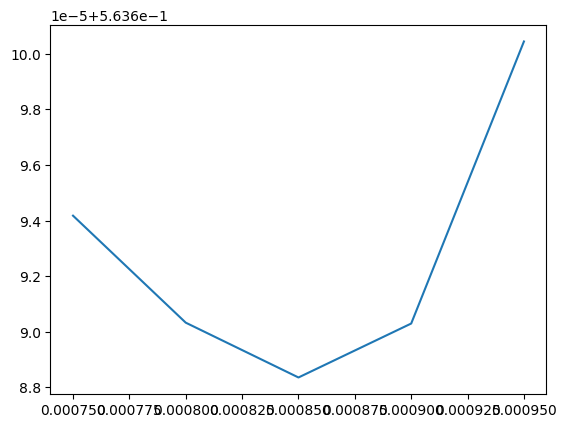

In [ ]:
plt.plot(np.flip(alphas), np.flip(RMSE))

A nice U shape!

Let's check the best model, and let's compare to the OLS model on the test sample that we have not yet used.

In [ ]:
model_lasso.set_params(alpha=0.00085)
yhat_test = model_lasso.predict(X_test)
TestRMSE_lasso = np.sqrt(mean_squared_error(y_test,yhat_test))
print(TestRMSE_lasso)

0.5617473174056234


In [ ]:
tmp = np.abs(model_lasso.predict(X_test)-y_test)
print(np.median(tmp))
print(np.quantile(tmp,0.9))
print(np.quantile(tmp,0.99))

0.36499756431979513
0.9119969342845885
1.5156605722626484


So a bit better than the OLS model!

## Via Cross Validation

As a small addition, let's repeat the model selection via cross validation rather than using the different splits.

That has the advantage that we can use a larger training set. So instead of using the same train-validation-test split above, I am using an alternative split where the training set is 75% of the data and a test set of 25% of the data (since these are different sets, the results won't be directly comparable to the results from before):

In [ ]:
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)
y_train = np.log(y_train)
y_test = np.log(y_test)

Let's use the cross validation funcionality in sklearn -- the details are [here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html). We use 5-fold cross validation (which is the default---so in case no argument is given, that is used). And I am asking to get 10 different alphas, thus already takes long enough

In [ ]:
model_lasso_cv = LassoCV(cv=5, random_state=0, n_alphas=10).fit(X_train, y_train)

This one runs a bit faster!

Let's look at the differnet alphas:

In [ ]:
model_lasso_cv.alphas_

array([0.38756557, 0.179892  , 0.08349847, 0.03875656, 0.0179892 ,
       0.00834985, 0.00387566, 0.00179892, 0.00083498, 0.00038757])

And let's check which one was selected as the best one:

In [ ]:
model_lasso_cv.alpha_

0.0008349847171107374

So very close to our alpha from above, but the advantage is that we did not have to specify and also that we can use a large training sample!

Let's get the predictions and evaluate on the test set:

In [ ]:
yhat_test = model_lasso_cv.predict(X_test)

And let's evaluate:

In [ ]:
TestRMSE_lasso = np.sqrt(mean_squared_error(y_test,yhat_test))
print(TestRMSE_lasso)

0.5606835698744835


In [ ]:
tmp = np.abs(y_test-yhat_test)
print(np.median(tmp))
print(np.quantile(tmp,0.9))
print(np.quantile(tmp,0.99))

0.3639031314250776
0.9095188633348222
1.5138312788747073


So the performance is similar!